In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

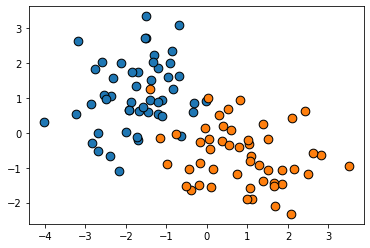

In [19]:
# Generate random data 

X, Y = make_blobs(n_features=2, centers=2)

plt.scatter(X[Y==0, 0], X[Y==0, 1], marker='o', s=75, edgecolor='k')
plt.scatter(X[Y==1, 0], X[Y==1, 1], marker='o', s=75, edgecolor='k')
plt.show()

In [20]:
def y_predict(X, y, w, b):
    z = np.dot(X, w) + b
    a = sigmoid(z)
    a[a >= 0.5] = 1
    a[a < 0.5] = 0
    return a

def sigmoid(x):
  return 1/(1 + np.exp(-x))


def model(X, y, learning_rate, iterations):
  n = X.shape[1]
  m = X.shape[0]
  
  w = np.zeros(n)
  b = 0
  cost_list = []
  
  for i in range(iterations):
      
      z = np.dot(X, w) + b
      a = sigmoid(z)
      
      # Cost
      cost = -(1/m)*np.sum( y*np.log(a) + (1-y)*np.log(1-a))
      
      # Gradient Descent
      dw = (1/m)*np.dot(X.T, (a-y))
      db = (1/m)*np.sum(a-y)
      
      w = w - learning_rate*dw
      b = b - learning_rate*db
      
      # Cost
      cost_list.append(cost)
      
  return w, b, cost_list

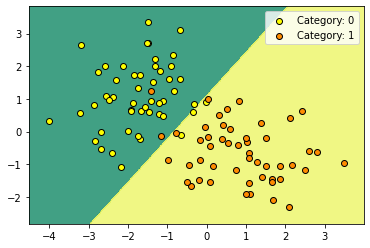

In [21]:
iterations = 4000
learning_rate = 0.1

w, b, cost_list = model(X, Y, learning_rate, iterations)
cost_list = np.reshape(cost_list, (len(cost_list),1))

y_ = y_predict(X, Y, w, b)


def draw_border(X, Y):
    # Minimum and maximum value and filling with zeros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Points grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict categories for each point on the grid
    xx_ = np.reshape(xx, (xx.shape[0]*xx.shape[1],1))
    yy_ = np.reshape(yy, (yy.shape[0]*yy.shape[1],1))

    X1 = np.concatenate((xx_ ,yy_), axis=1)
    y_ = y_predict(X1, Y, w, b)
    y_ = np.reshape(y_, (xx.shape[0], xx.shape[1]))

    fig = plt.figure()
    plt.contourf(xx, yy, y_, cmap='summer', alpha=0.8)

    plt.scatter(X[Y==0, 0],X[Y==0, 1], color='yellow', edgecolor='k', label='Category: 0')
    plt.scatter(X[Y==1, 0],X[Y==1, 1], color='darkorange', edgecolor='k', label='Category: 1')
    plt.legend()
    plt.show()

draw_border(X, Y)

In [22]:
def accuracy(X, y, w, b):
    
    z = np.dot(X, w) + b
    a = sigmoid(z)
    a = a > 0.5
    a = np.array(a, dtype = 'int64')
    acc = (1 - np.sum(np.abs(a - y))/X.shape[0])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

accuracy(X, Y, w, b)
print('Parameter w: ', w, 'Parameter b: ', b)

Accuracy of the model is :  95.0 %
Parameter w:  [ 2.87777241 -2.17010762] Parameter b:  2.3989801482168387
